<a href="https://colab.research.google.com/github/vinhbui123/machine_learning/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


Import libraries

In [15]:
from google.colab import files, drive

import pandas as pd
import numpy as np
import os


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

import itertools

Task 1. The Iris dataset includes the following attributes:

1.1. Visualizes different species of the Iris dataset based on each combination
between features (i.e., sepal length (cm) vs sepal width (cm), sepal length
(cm) vs petal length (cm), ...)

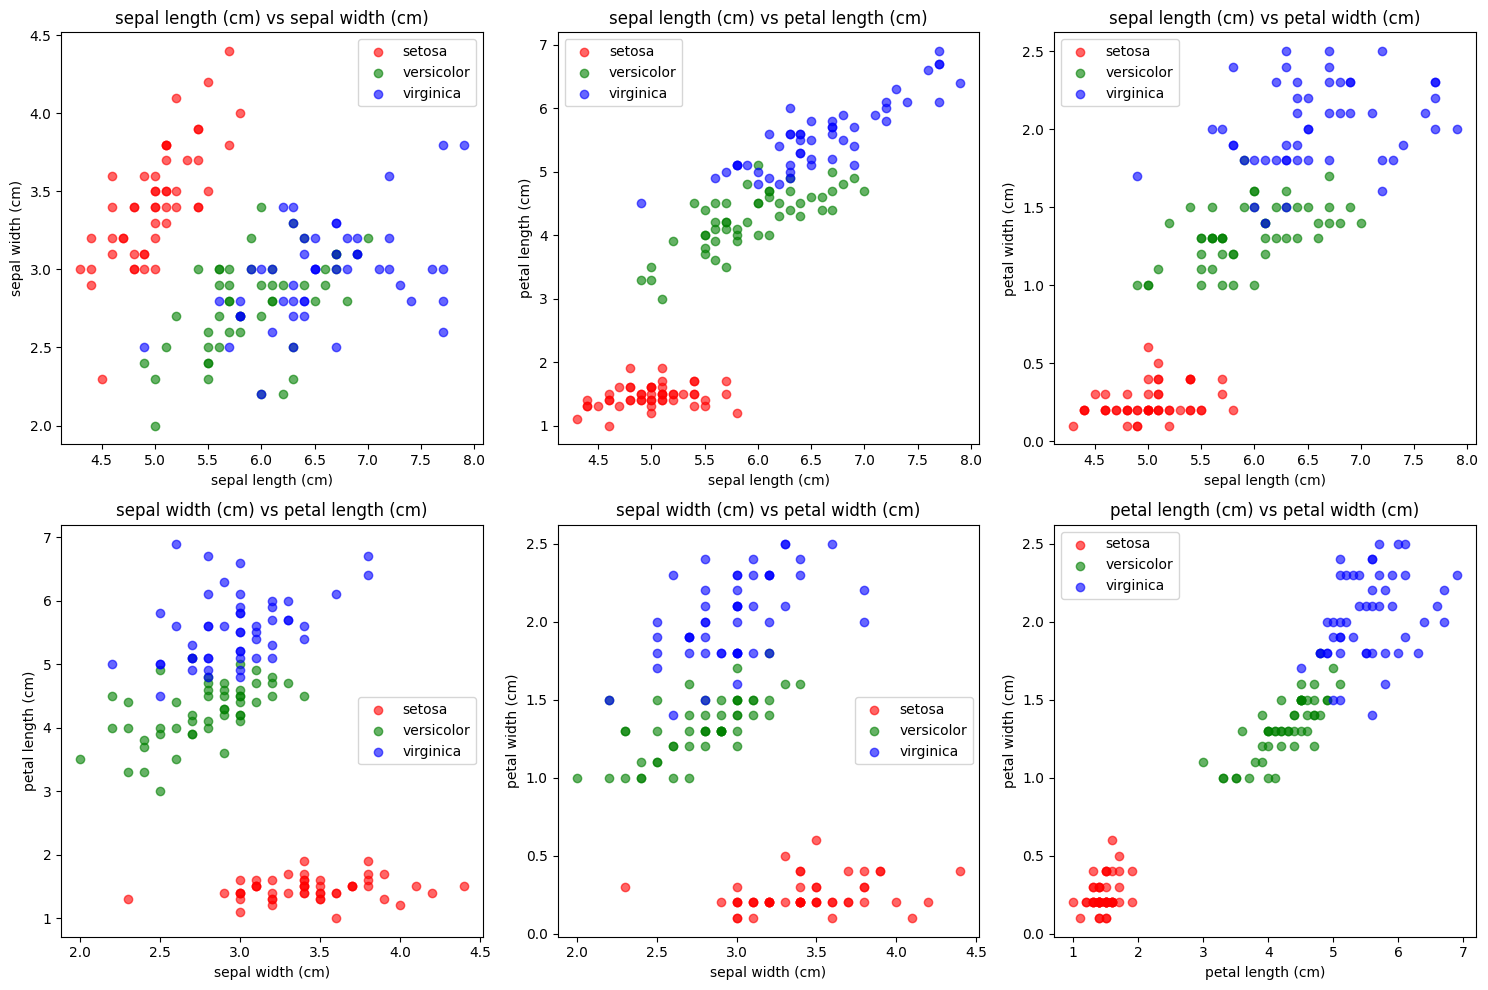

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapping target numbers to species names
species = iris.target_names
df['species'] = df['species'].apply(lambda x: species[x])

# Define colors and feature names
colors = ['red', 'green', 'blue']
features = iris.feature_names

# Create scatter plots for all feature combinations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Changed to 2 rows, 3 columns
axes = axes.ravel()  # Flatten axes for easier iteration

for i, (feature1, feature2) in enumerate(itertools.combinations(features, 2)):
    for species_idx, color in enumerate(colors):
        species_data = df[df['species'] == species[species_idx]]
        axes[i].scatter(species_data[feature1], species_data[feature2],
                        color=color, label=species[species_idx], alpha=0.6)

    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].legend()
    axes[i].set_title(f"{feature1} vs {feature2}")

plt.tight_layout()
plt.show()

1.2. Visualize the proportion of each Iris species in the dataset using a Pie chart.

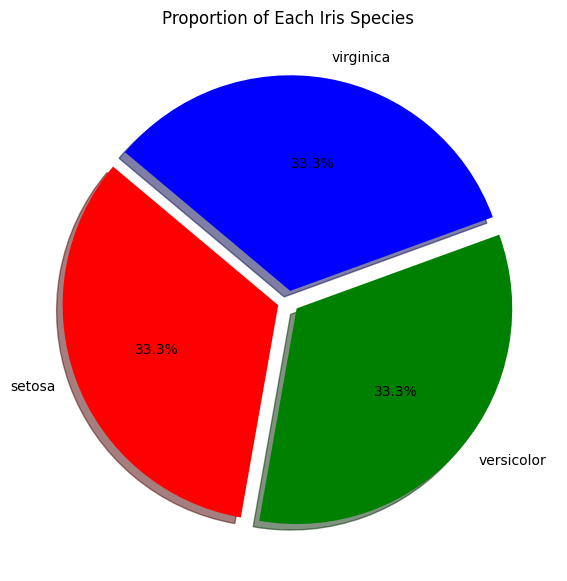

In [6]:
iris = load_iris(as_frame=True)
df = iris.data
df['species'] = iris.target

df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

species_counts = df['species'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%',
        colors=['red', 'green', 'blue'], startangle=140, shadow=True, explode=(0.05, 0.05, 0.05))

plt.title("Proportion of Each Iris Species")
plt.show()

1.3. Build a Decision Tree model

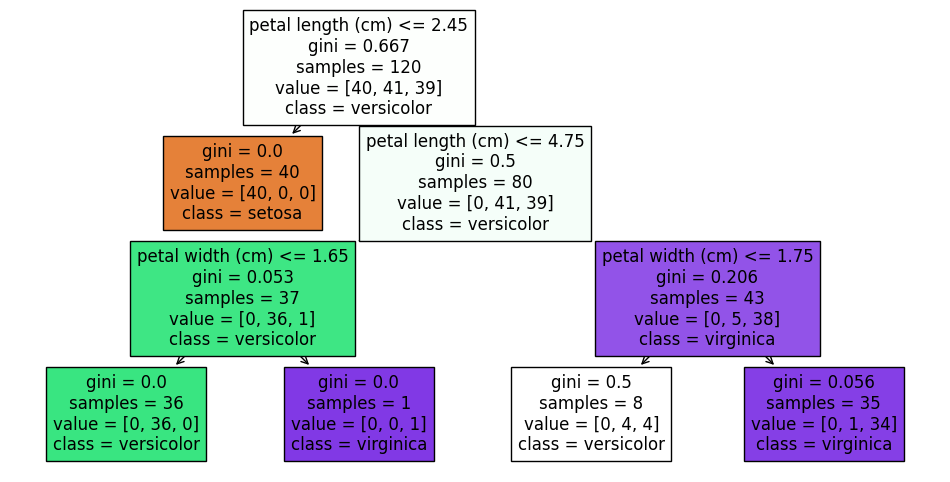

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

1.4. Build a Logistic Regression model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


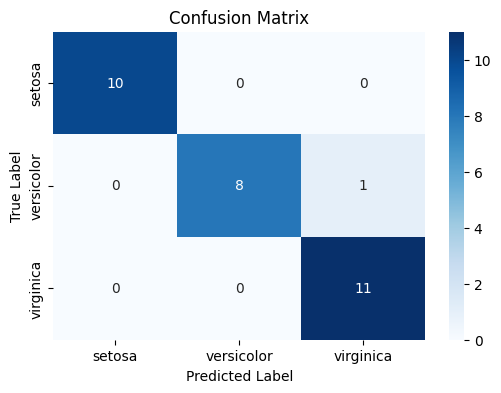

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

2.2. Plot the correlation between features using the heatmap

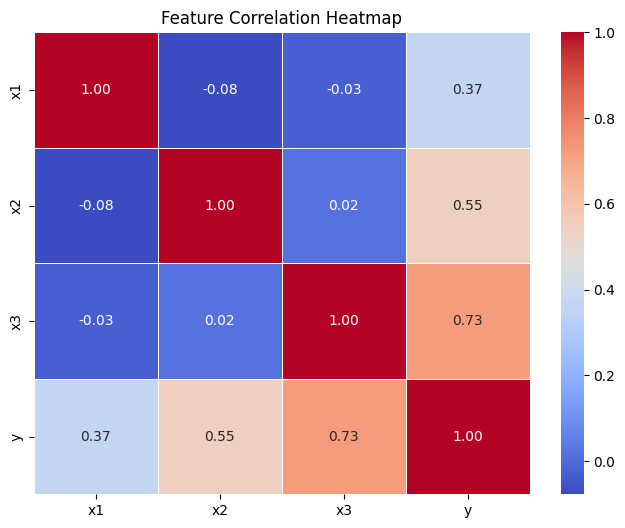

In [ ]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


2.3. Apply LinearRegresion to each combination in the task 2.1

In [ ]:
# Apply Linear Regression to each feature separately
results = {}

for feature in ["x1", "x2", "x3"]:
    X_train = train_df[[feature]]
    y_train = train_df["y"]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store the intercept and coefficient
    results[feature] = (model.intercept_, model.coef_[0])

results


{'x1': (np.float64(3.7178569092247753), np.float64(2.551938933768129)),
 'x2': (np.float64(4.189433182774397), np.float64(3.847978018279782)),
 'x3': (np.float64(3.6285041227199355), np.float64(4.9797033243317586))}

2.4. Report the performance of the model trained in the task 2.3

In [ ]:
# Evaluate performance for each feature separately
performance = {}

for feature in ["x1", "x2", "x3"]:
    X_train = train_df[[feature]]
    y_train = train_df["y"]
    X_test = test_df[[feature]]
    y_test = test_df["y"]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Compute MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    performance[feature] = {"MSE": mse, "R²": r2}

performance

{'x1': {'MSE': 76.15433783733396, 'R²': 0.27710083004479535},
 'x2': {'MSE': 69.58401286817033, 'R²': 0.33946999510391096},
 'x3': {'MSE': 61.86057027053934, 'R²': 0.41278519160591465}}

Task 3

3.1. Load dataset3, apply StandardScaler() to standardize datataset and repare trainning set,
test set

In [ ]:
# Load the dataset (For Google Colab)
uploaded = files.upload()

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset3.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df3 = pd.read_csv(file_name, encoding=enc, sep = ';')
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue


Saving dataset3.csv to dataset3 (2).csv
Files in current directory: ['dataset4.xlsx', 'dataset1.csv', 'dataset2.csv', 'dataset3.csv', 'dataset1 (1).csv', 'dataset3 (1).csv', 'dataset1 (2).csv', 'dataset2 (1).csv', 'dataset3 (2).csv']
Successfully loaded with encoding: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  a

(None,
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  
 1      9.5        

((3918, 11), (980, 11), (3918,), (980,))

3.2. Plot the correlation between features using the heatmap

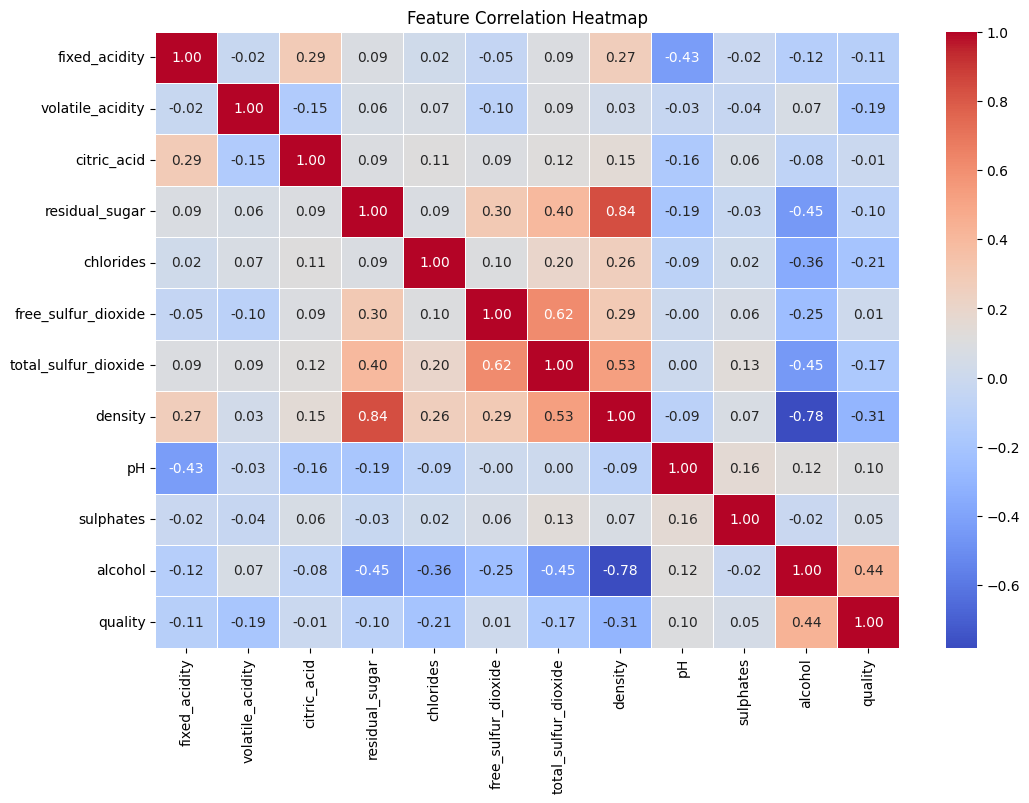

3.3. Apply Linear Regression to the preprocessed dataset

(0.5793874861746244, 0.2619326430893075)

3.4. Apply feature selection to find the best features and then train the Regression Model with
these best features

(Index(['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'density',
        'alcohol'],
       dtype='object'),
 0.6059755781771592,
 0.22806273174694447)

3.5. Compare the performance of the models (with and without feature selection) using
RMSE, R2

,Model,RMSE,R² Score
0,Linear Regression (All Features),0.761175,0.261900
1,Linear Regression (Selected Features),0.778444,0.228063


Task 4

4.1. Load dataset4, apply StandardScaler() to standardize datataset and repare trainning set,
test set

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


((614, 8), (154, 8), (614, 2), (154, 2))

4.2. Plot the correlation between features using the heatmap

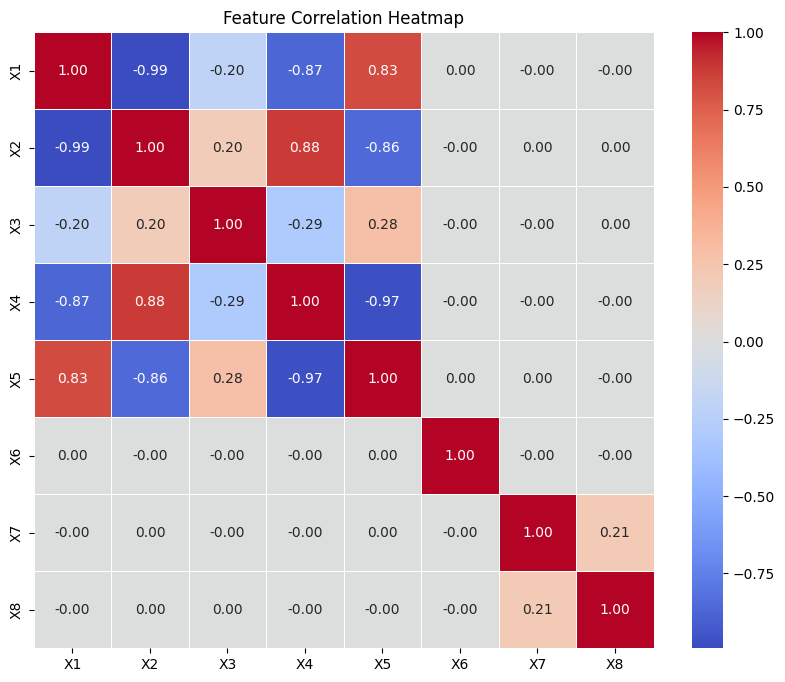

4.3. Apply Linear Regression to the preprocessed dataset

(9.52331764694287, 0.9027050781479864)

4.4. Apply feature selection to find the best features and then train the Regression Model with
these best features

,Feature,Score
4,X5,2386.148657
3,X4,1802.286271
1,X2,505.373497
0,X1,415.374592
2,X3,135.250328
6,X7,39.759865
7,X8,2.504298
5,X6,0.024514


(14.612831678130352, 0.8516916714680538)

4.5. Compare the performance of the models (with and without feature selection) using
RMSE, R2

                    Model     RMSE  R² Score
             All Features 3.085987  0.902705
Selected Features (Top 5) 3.822673  0.851692
